# What is a Decision Tree

According to <a href="https://en.wikipedia.org/wiki/Decision_tree">Wikipedia.</a>
<p><i><h4>
"A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements"
    </h4>   </i></p>

<h2>What does this mean? </h2>

The idea is that you take decision on each node and eventually you know what decision you should take. Like, If the <b>outlook</b> is <b><i>sunny</i></b> and <b>humidity</b> is <b><i>low</i></b> . I think I will say <b>yes</b> to playing tennis and it should look something like this
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png" alt="Decision Tree">





# How to Construct a Decision Tree

<p>
That is where the problem starts ? 

Almost everyone after looking at decision tree can tell how they work but when you raise the question how to build it programatically most of the people will look away. 

But why is that, The structure looks so simple and easy to grasp, it should be easy to implement as well. 

Answer is "yes" it is easy to implement, most of the people have not thought how to implement it programmatically because the visual interpretation is so close to how we make our decisions , it becomes almost intuitive. And once you have intuition about something you will not have too many questions. 

For example if we show Neural netwrok to people and tell them this works with 90% accuracy, most of the people would say <b> "how?" </b>, because the neural network structure is not intuitive at first glance.

</p>

# 1. Load data
We will be using an example dataset throughout (Famous Iris Dataset). 

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 2. Extract Rules from Decision Tree with Scikit-Learn and Python

The rules extraction from the Decision Tree can help with better understanding how samples propagate through the tree during the prediction. It can be needed if we want to implement a Decision Tree without Scikit-learn or different than Python language. Decision Trees are easy to move to any programming language because there are set of if-else statements. I’ve seen many examples of moving scikit-learn Decision Trees into C, C++, Java, or even SQL.

In this lecture, I will show you how to get decision rules from the Decision Tree (for both classification and regression tasks) with following approaches:

built-in text representation,
convert a Decision Tree to the code (can be in any programming language)
convert a Decision Tree to set of rules which are human-readable 

## 2.1 Train Decision Tree on Classification Task

Let's train a DecisionTreeClassifier on the iris dataset.

In [7]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

### Build Model
The **DecisionTreeClassifier** is a classification model from the Scikit-learn library based on the concept of a decision tree. The DecisionTreeClassifier builds a decision tree from the given training data and then uses it to classify new input data. This model is particularly useful in identifying patterns and relationships in complex, multidimensional data sets. It is easy to understand and interpret, and it is also robust to changes in the data.

In [8]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

### Scikit-Learn Built-in Text Representation

The Scikit-Learn Decision Tree class has an export_text(). It returns the text representation of the rules.

In [9]:
# get the text representation
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



### You can pass the feature names as the argument to get better text representation:


In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

In [12]:
text_representation = tree.export_text(clf, feature_names=iris.feature_names,class_names=list(iris.target_names))
print(text_representation)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



### If you want to save it to the file, it can be done with following code:

In [13]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

### Plot Tree with plot_tree
The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. It allows us to easily produce figure of the tree (without intermediate exporting to graphviz) The more information about plot_tree arguments are in the docs.

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

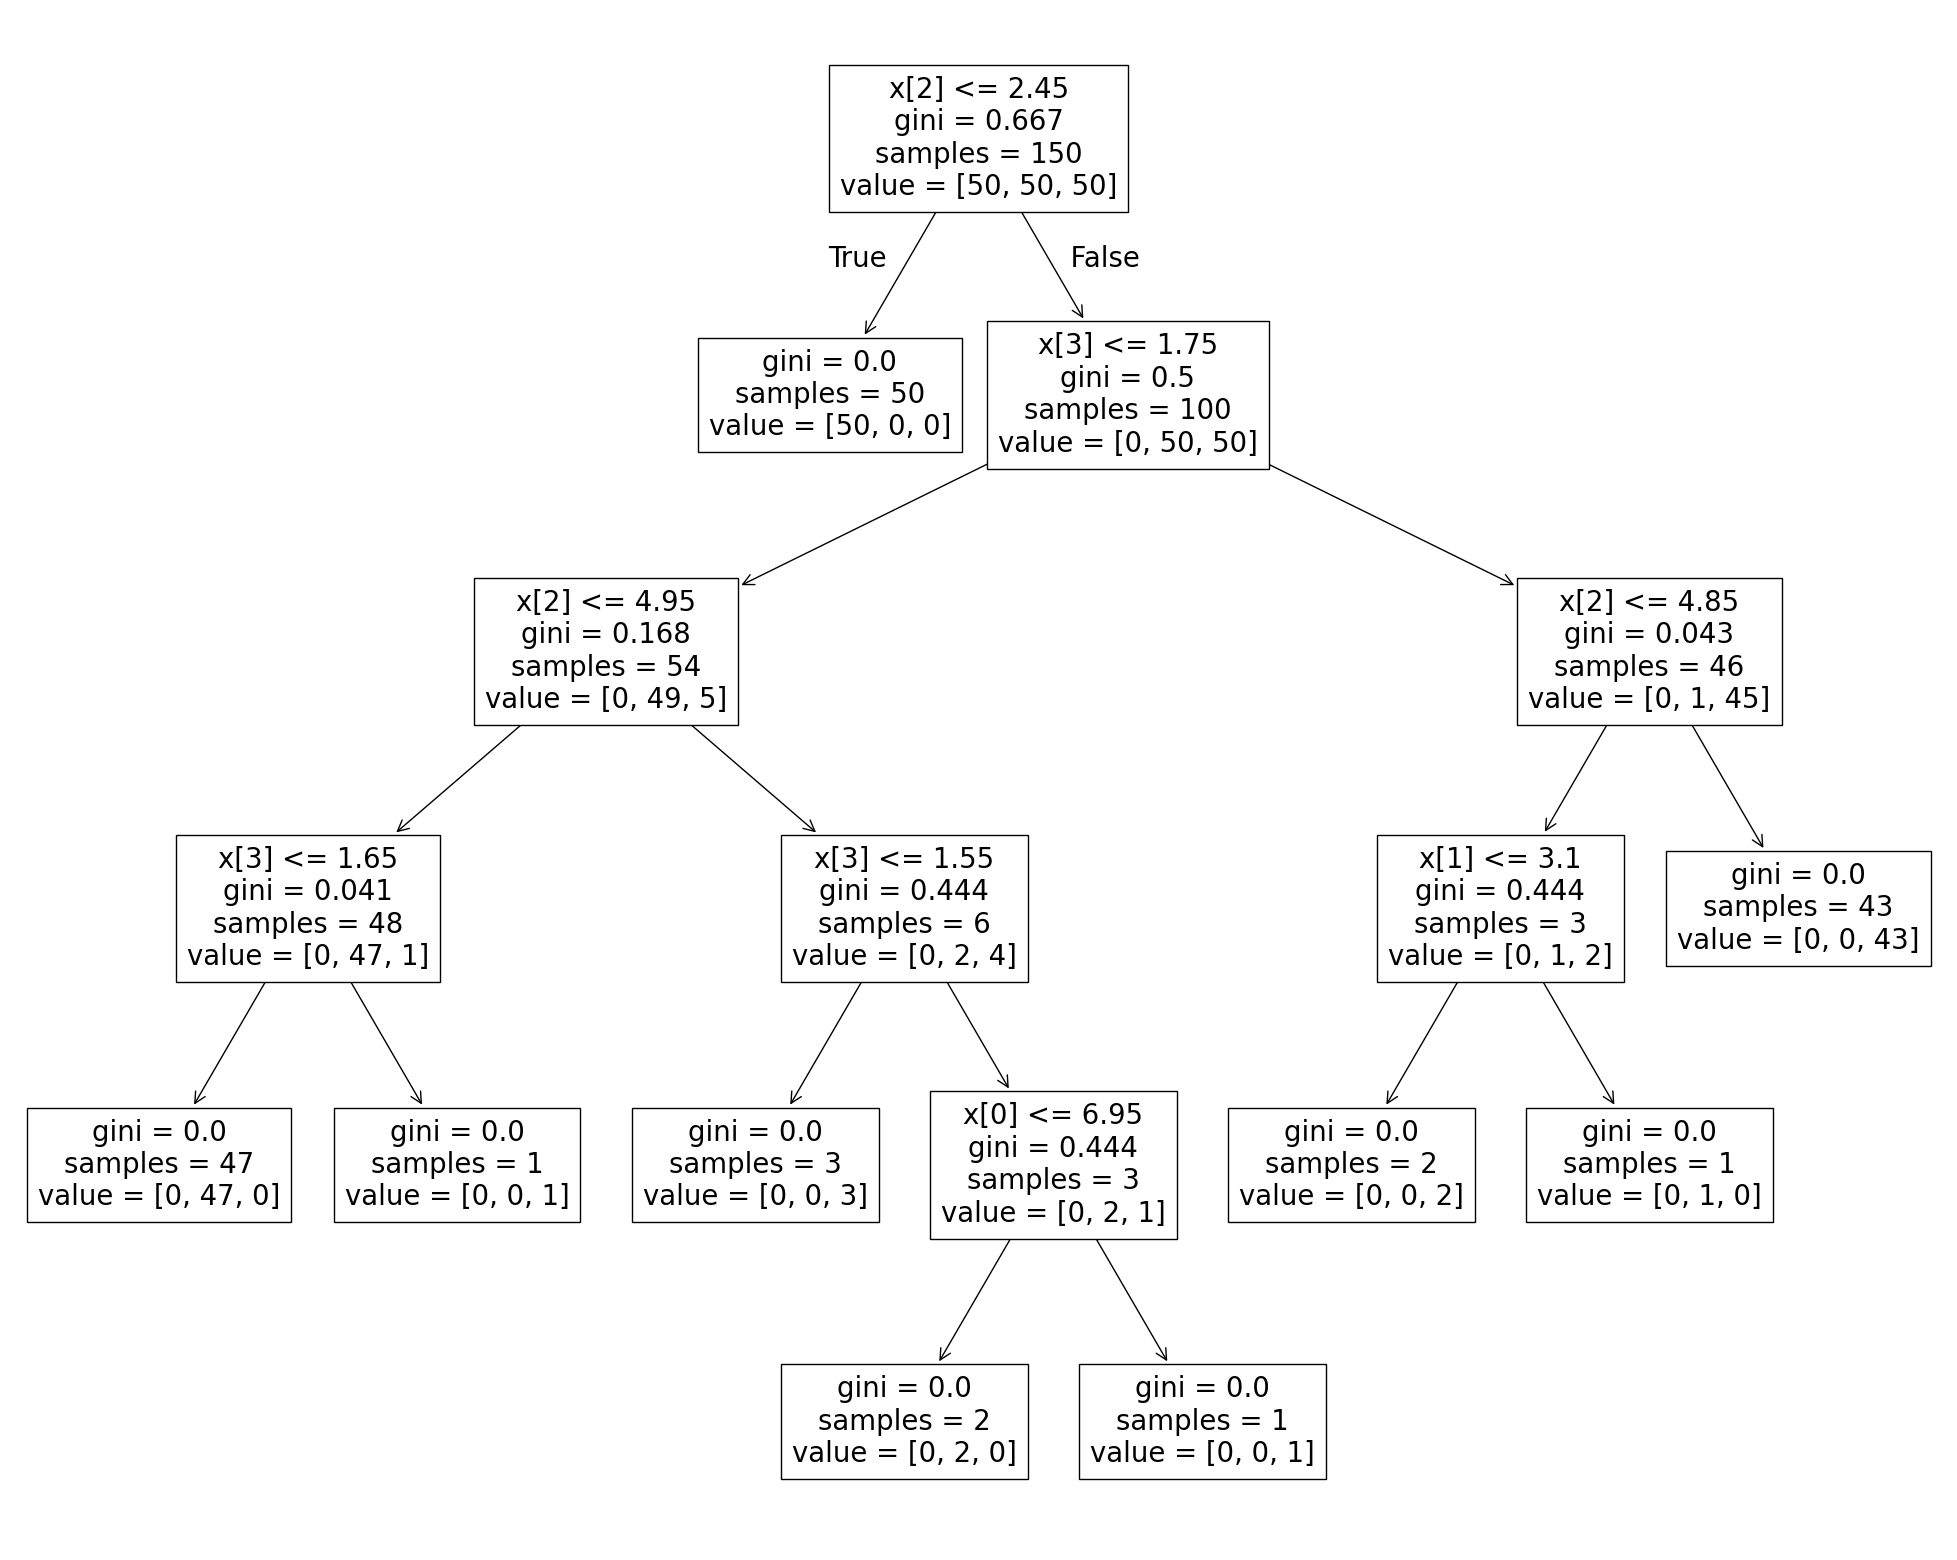

In [16]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)

### The decision tree learning algorithm recursively learns the tree as follows:

1. Assign all training instances to the root of the tree. Set curent node to root node.
2. For each attribute Partition all data instances at the node by the value of the attribute.
3. Compute the information gain ratio from the partitioning.
4. Identify feature that results in the greatest information gain ratio. Set this feature to be the splitting criterion at the current node.
5. If the best information gain ratio is 0, tag the current node as a leaf and return.
6. Partition all instances according to attribute value of the best feature.
7. Denote each partition as a child node of the current node.
8. For each child node:
    a. If the child node is “pure” (has instances from only one class) tag it as a leaf and return.
    b. If not set the child node as the current node and recurse to step 2.
    

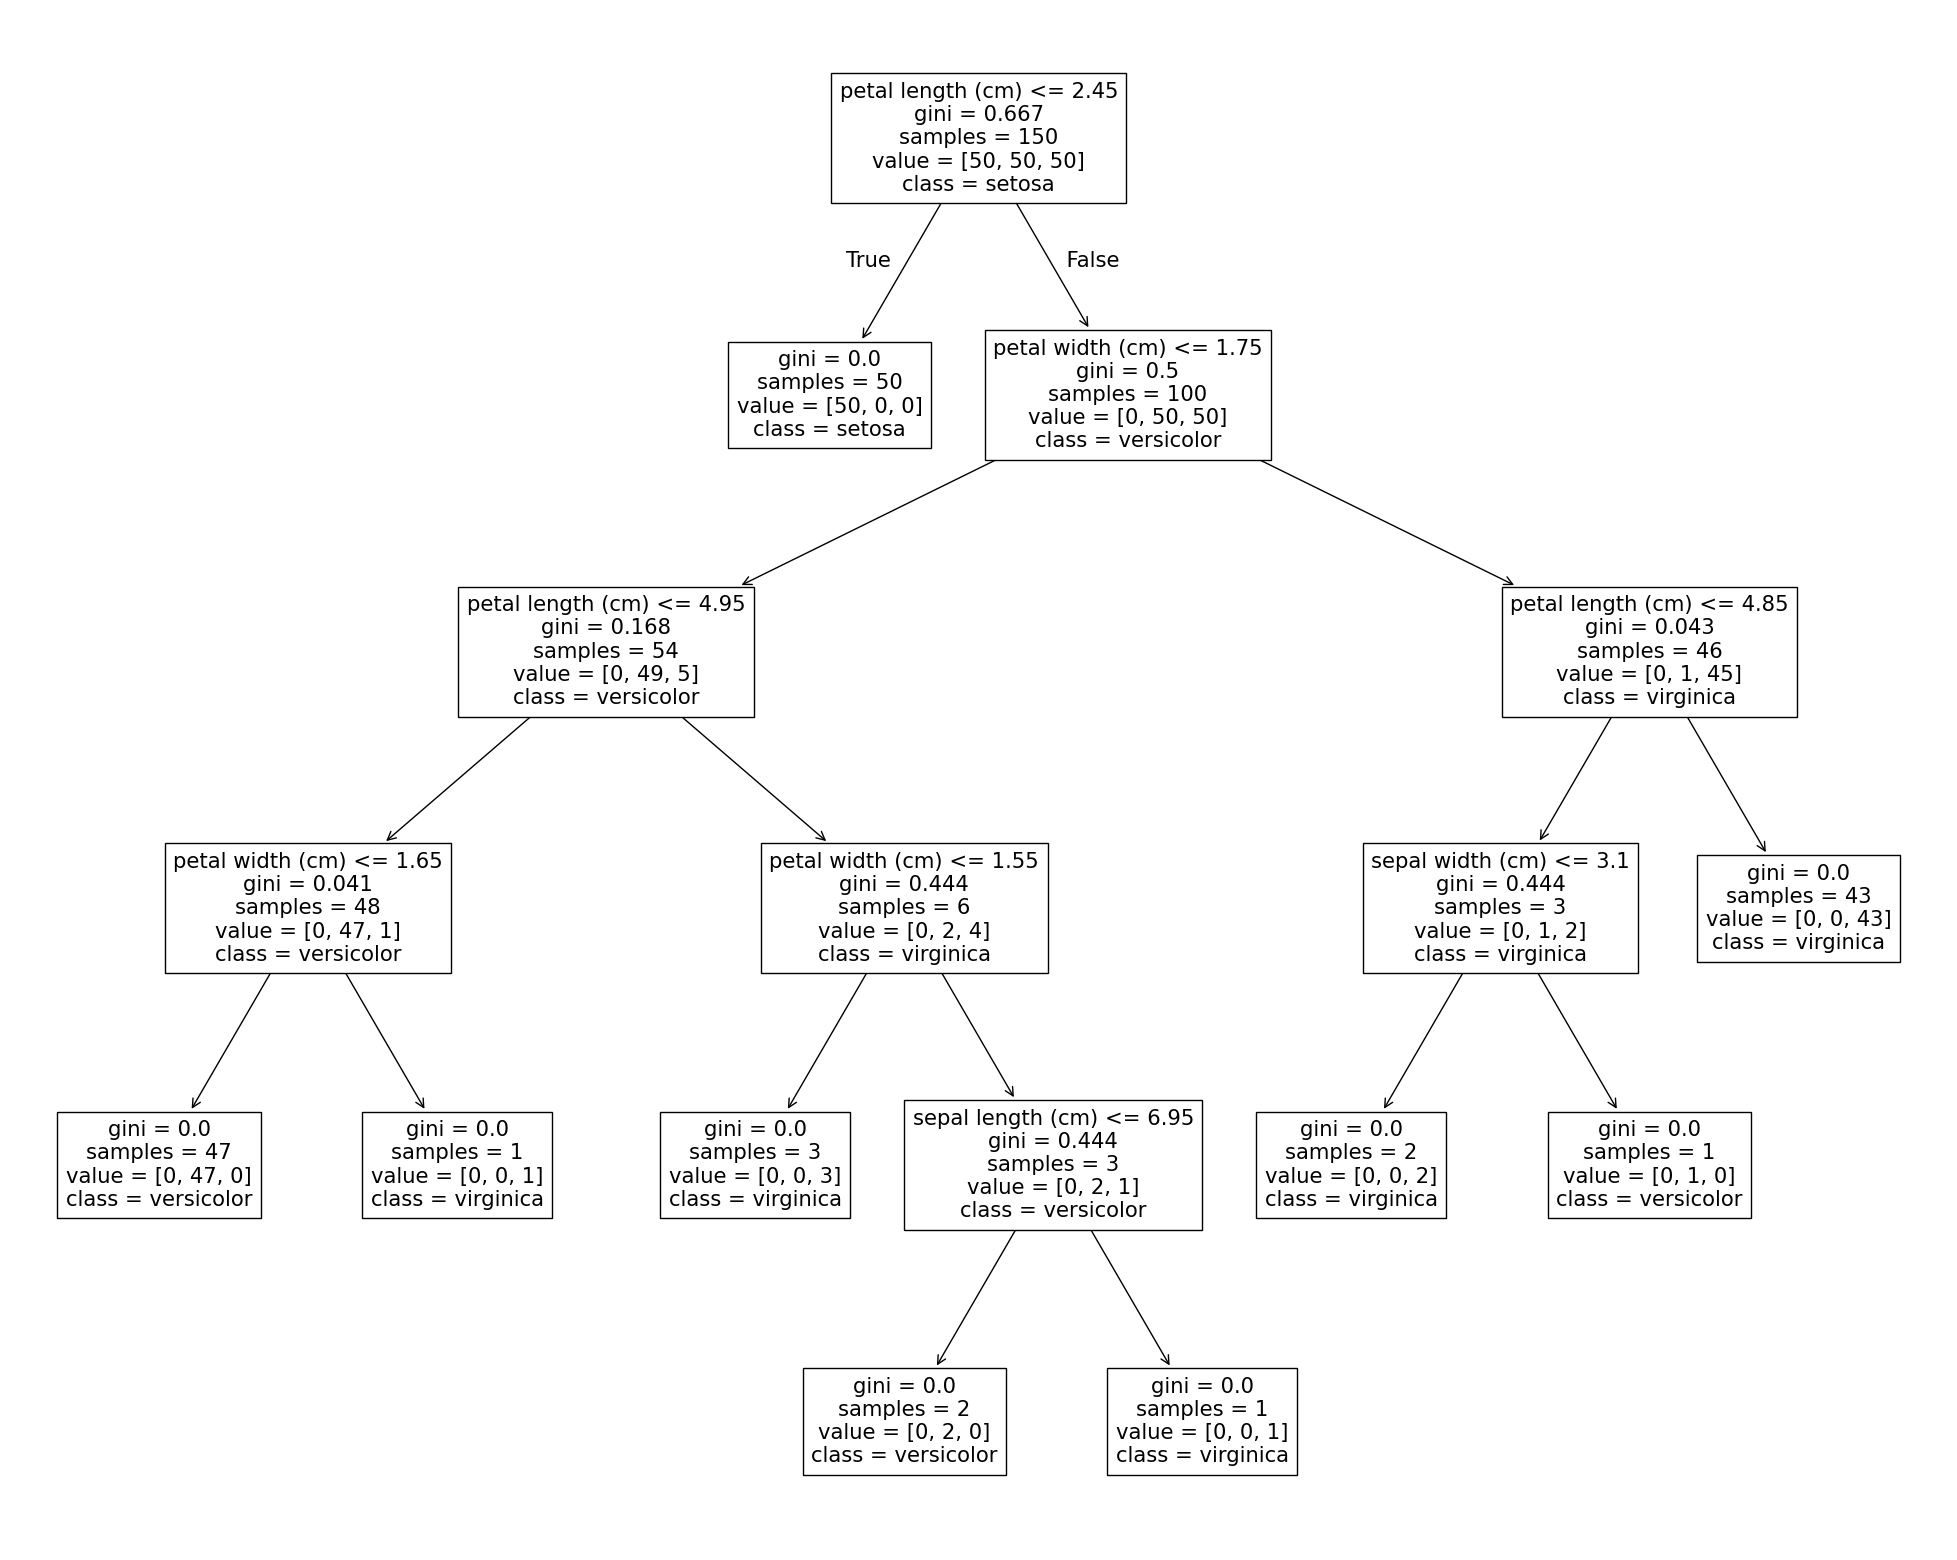

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=list(iris.target_names),)

**Gini impurity** is a measure used in decision tree algorithms to quantify a dataset’s impurity level or disorder. In binary classification problems, it assesses the likelihood of an incorrect classification when a randomly selected data point is assigned a class label based on the distribution of classes in a particular node. It ranges from 0 to 0.5, where 0 indicates a perfectly pure node (all instances belong to the same class), and 0.5 signifies maximum impurity (an equal distribution of classes). In decision trees, it aids in selecting the optimal split by identifying features that result in more homogeneous subsets of data, ultimately contributing to the creation of accurate and reliable predictive models.

## $$ Gini = 1 - \sum_{i=1}^{n} p_i^2 $$
where pi is the proportion of items labeled with class i in the set, and the sum is taken over all unique classes in the set.

## 2.2 DecisionTreeRegressor
**DecisionTreeRegressor** is a class provided by scikit-learn, a popular machine learning library in Python, used to perform regression tasks with decision trees. Similar to DecisionTreeClassifier, which is used for classification tasks, DecisionTreeRegressor predicts the value of a target variable by learning simple decision rules inferred from the data features. However, unlike classification that predicts discrete labels, regression is used to predict continuous values.

In [18]:
from sklearn.tree import DecisionTreeRegressor
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X,y)

text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- value: [0.00]
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- value: [1.02]
|   |   |--- feature_2 >  4.95
|   |   |   |--- value: [1.67]
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- value: [1.67]
|   |   |--- feature_2 >  4.85
|   |   |   |--- value: [2.00]



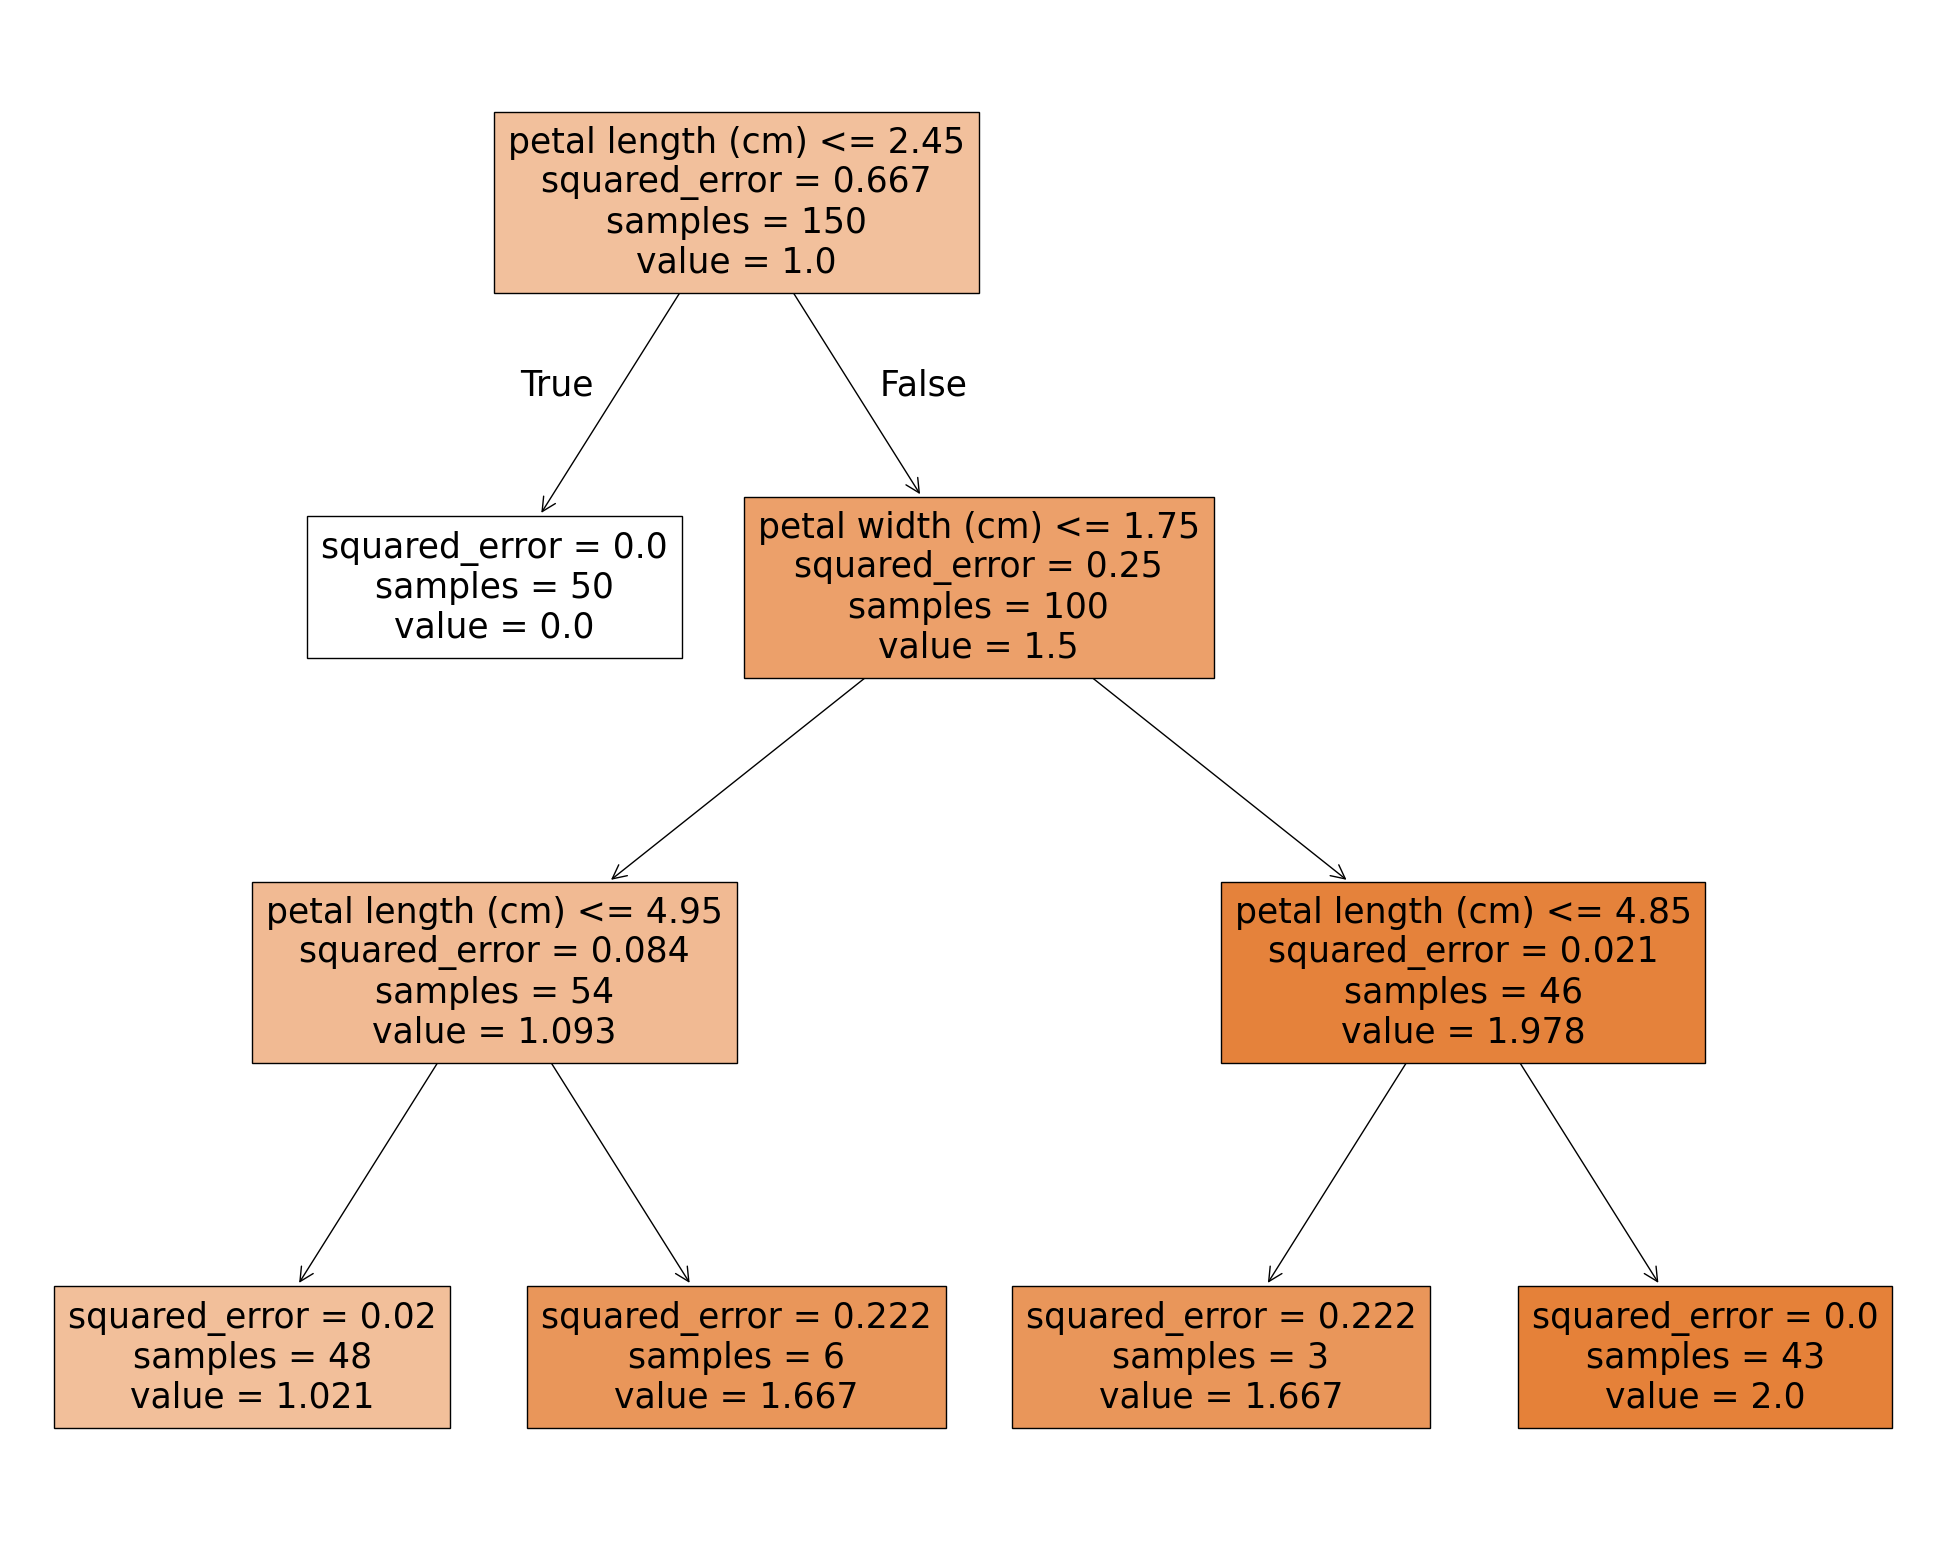

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=iris.feature_names, filled=True)

# 3. Decision Tree Classification Prediction

In [21]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=43)

# Create a Decision Tree Classifier model
classifier = DecisionTreeClassifier(random_state=1234)

# Train the model
classifier.fit(X_train,y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0])

In [23]:
y_test

array([0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0])

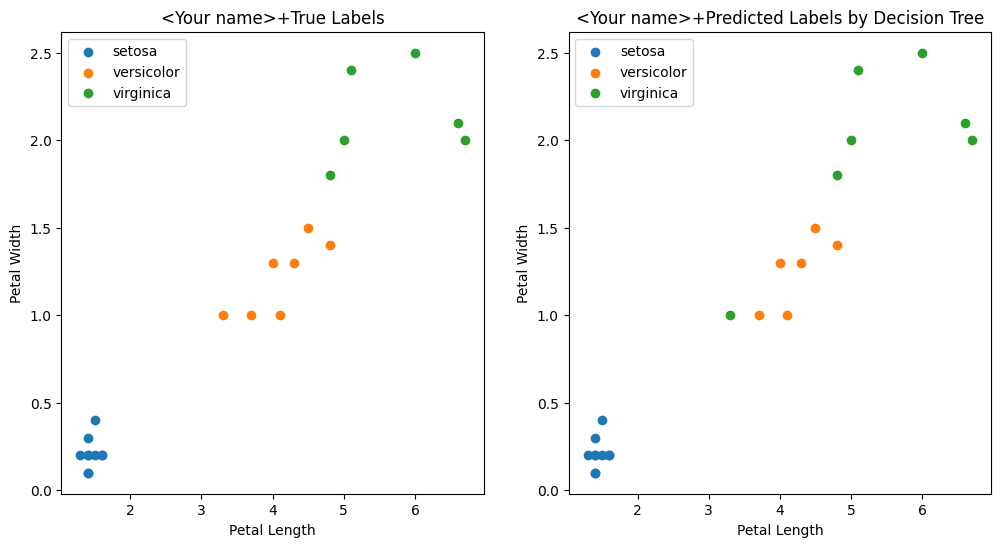

In [25]:
labelnames = list(iris.target_names)
targetname = [0,1,2]
# For visualization, we'll use only two dimensions: Petal Length and Petal Width
plt.figure(figsize=(12, 6))

# Plotting the true labels
plt.subplot(1, 2, 1)
for i in range(len(targetname)):
    subset = X_test[y_test==targetname[i]]
    plt.scatter(subset[:,-2],subset[:,-1],label=labelnames[i])


# please also add your name on title
plt.title("<Your name>+True Labels")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# Plotting the predicted labels
plt.subplot(1, 2, 2)
for i in range(len(targetname)):
    subset = X_test[y_pred==targetname[i]]
    plt.scatter(subset[:,-2],subset[:,-1],label=labelnames[i])


# please also add your name on title
plt.title("<Your name>+Predicted Labels by Decision Tree")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.show()

# Practice Lab: Decision Tree Classifier

### Objective
In this exercise, you will:
1. Train a **Decision Tree** classifier using a small dataset.  
2. Visualize the decision tree structure.  
3. Interpret how features influence the final decision.  

---

## Dataset Description
You will use a simple dataset of students deciding whether to **pass an exam** based on two factors:

| Hours_Studied | Attendance | Pass |
|----------------|-------------|------|
| 2 | Low | No |
| 4 | Low | No |
| 6 | Medium | Yes |
| 8 | High | Yes |
| 5 | High | Yes |
| 3 | Medium | No |
| 7 | High | Yes |

- **Features:**  
  - `Hours_Studied` — numeric (continuous)  
  - `Attendance` — categorical (`Low`, `Medium`, `High`)  
- **Target:** `Pass` (`Yes` / `No`)

---
## Task Requirements

1. Create a small DataFrame using the data above.  
2. Encode the categorical variable `Attendance` (e.g., using LabelEncoder).  
3. Train a **Decision Tree Classifier** using scikit-learn.  
4. Visualize the decision tree using `plot_tree()`.  
5. Predict whether a new student who studied **6 hours** and had **Medium attendance** will pass.  
6. Explain which feature seems more important to the model.  

---



In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = {
    'Hours_Studied': [2, 4, 6, 8, 5, 3, 7],
    'Attendance': ['Low', 'Low', 'Medium', 'High', 'High', 'Medium', 'High'],
    'Pass': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

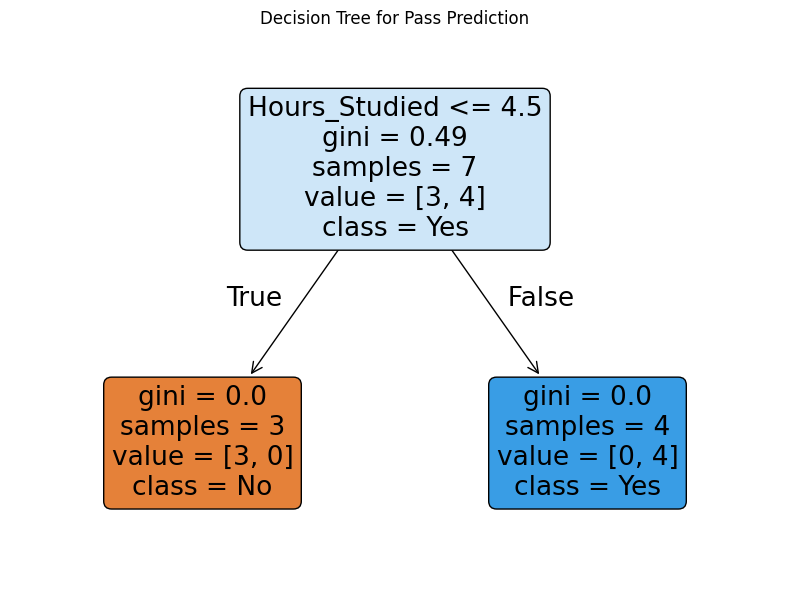

In [38]:
## Step 1
df = pd.DataFrame(data)

## Step 2
attn_le = LabelEncoder()
df['Attendance_enc'] = attn_le.fit_transform(df['Attendance'])

pass_le = LabelEncoder()
df['Pass_enc'] = pass_le.fit_transform(df['Pass'])

## Step 3
X = df[['Hours_Studied', 'Attendance_enc']].values
y = df['Pass_enc'].values
classifier= DecisionTreeClassifier(random_state=1234, max_depth=None)
classifier.fit(X,y)

## Step 4
plt.figure(figsize=(8, 6))
plot_tree(
    classifier,
    feature_names=['Hours_Studied', 'Attendance_enc'],
    class_names=pass_le.classes_,
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Pass Prediction")
plt.tight_layout()
plt.show()



In [39]:
## Step 5
hours_new = 6
attendance_new = 'Medium'
attendance_new_enc = attn_le.transform([attendance_new])[0]
pred_enc = classifier.predict([[hours_new, attendance_new_enc]])[0]
pred_label = pass_le.inverse_transform([pred_enc])[0]
print("Prediction for 6 hours + Medium attendance:", pred_label)


Prediction for 6 hours + Medium attendance: Yes


In [40]:
## Step 6 our feature importance:
print("Feature importances [Hours_Studied, Attendance_enc]:", classifier.feature_importances_)
print("Attendance encoding:", dict(zip(attn_le.classes_, attn_le.transform(attn_le.classes_))))


Feature importances [Hours_Studied, Attendance_enc]: [1. 0.]
Attendance encoding: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
